In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
# IMPORT DESIRED INTERACTION CLASS AND CONFIGURATION
import sys
import os
import numpy as np

# Get the parent directory (where `configs/` and `interactions/` are located)
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Add it to sys.path
sys.path.append(parent_dir)

# Now you should be able to import
from interactions import ppo_interaction as ppo
# from configs.interaction_configs.ppo_interaction_configs import ppo_interaction_config
# from configs.interaction_configs.ppo_interaction_configs import ppo_interaction_texasholdem_config
from configs.ppo_configs import ppo_interaction_config_texas, texas_holdem_config, actor_configs_texas, critic_configs_texas
from configs.llm_configs import texas_holdem_llm_agent_configs
# from configs.agent_configs.a_ppo_agents import actor_configs, critic_configs

In [2]:
ppo_interaction = ppo.PPO_interaction(interaction_configs=ppo_interaction_config_texas,
                    env_configs = texas_holdem_config,
                      actor_configs = actor_configs_texas,
                      critic_configs = critic_configs_texas,
                      llm_configs=texas_holdem_llm_agent_configs
                  )

train_scores, trained_agents = ppo_interaction.train_multiagent()
print(train_scores)

🖥  Using device: cpu
self obs size: 76


  0%|          | 1978/2000000 [00:02<56:40, 587.54it/s] 

[PPO UPDATE] avg_actor_loss=0.0381, avg_critic_loss=10.3617


  0%|          | 4152/2000000 [00:04<53:27, 622.34it/s] 

[PPO UPDATE] avg_actor_loss=0.0252, avg_critic_loss=6.4429


  0%|          | 6252/2000000 [00:06<45:26, 731.26it/s] 

[PPO UPDATE] avg_actor_loss=0.0301, avg_critic_loss=7.8083


  0%|          | 8338/2000000 [00:08<55:49, 594.59it/s] 

[PPO UPDATE] avg_actor_loss=0.0353, avg_critic_loss=6.9943


  1%|          | 10385/2000000 [00:10<55:28, 597.74it/s] 

[PPO UPDATE] avg_actor_loss=0.0245, avg_critic_loss=8.3488


  1%|          | 12530/2000000 [00:12<53:51, 614.96it/s]  

[PPO UPDATE] avg_actor_loss=0.0306, avg_critic_loss=6.5672


  1%|          | 14626/2000000 [00:14<49:25, 669.49it/s] 

[PPO UPDATE] avg_actor_loss=0.0411, avg_critic_loss=6.7941


  1%|          | 16621/2000000 [00:16<46:57, 703.87it/s] 

[PPO UPDATE] avg_actor_loss=0.0319, avg_critic_loss=7.3485


  1%|          | 18749/2000000 [00:19<48:49, 676.26it/s] 

[PPO UPDATE] avg_actor_loss=0.0290, avg_critic_loss=7.0692


  1%|          | 20752/2000000 [00:21<50:46, 649.71it/s] 

[PPO UPDATE] avg_actor_loss=0.0159, avg_critic_loss=8.2263


  1%|          | 22817/2000000 [00:23<49:21, 667.59it/s] 

[PPO UPDATE] avg_actor_loss=0.0279, avg_critic_loss=6.9165


  1%|          | 24970/2000000 [00:25<47:46, 688.94it/s] 

[PPO UPDATE] avg_actor_loss=0.0200, avg_critic_loss=6.4910


  1%|▏         | 26974/2000000 [00:27<49:31, 663.95it/s] 

[PPO UPDATE] avg_actor_loss=0.0515, avg_critic_loss=7.7234


  1%|▏         | 29129/2000000 [00:29<45:02, 729.39it/s] 

[PPO UPDATE] avg_actor_loss=0.0470, avg_critic_loss=6.9922


  2%|▏         | 31181/2000000 [00:31<51:51, 632.79it/s] 

[PPO UPDATE] avg_actor_loss=0.0237, avg_critic_loss=6.2652


  2%|▏         | 33268/2000000 [00:33<56:01, 585.12it/s] 

[PPO UPDATE] avg_actor_loss=0.0429, avg_critic_loss=6.3564


  2%|▏         | 34962/2000000 [00:35<33:07, 988.91it/s] 


KeyboardInterrupt: 

100%|██████████| 2000/2000 [00:00<00:00, 2232.35it/s]


[np.float64(0.5), np.float64(0.5), np.float64(-0.5), np.float64(1.0), np.float64(0.5), np.float64(-0.5), np.float64(-0.5), np.float64(-0.5), np.float64(0.5), np.float64(-0.5), np.float64(0.5), np.float64(-0.5), np.float64(0.5), np.float64(1.0), np.float64(0.5), np.float64(-0.5), np.float64(0.5), np.float64(-0.5), np.float64(-0.5), np.float64(-0.5), np.float64(0.5), np.float64(-0.5), np.float64(-0.5), np.float64(-0.5), np.float64(0.5), np.float64(-1.0), np.float64(-0.5), np.float64(-0.5), np.float64(0.5), np.float64(0.5), np.float64(-0.5), np.float64(-1.0), np.float64(1.0), np.float64(-0.5), np.float64(-0.5), np.float64(-0.5), np.float64(0.5), np.float64(0.5), np.float64(0.5), np.float64(-0.5), np.float64(-0.5), np.float64(-0.5), np.float64(-0.5), np.float64(-0.5), np.float64(0.5), np.float64(0.5), np.float64(0.5), np.float64(0.5), np.float64(-0.5), np.float64(0.5), np.float64(-1.0), np.float64(0.5), np.float64(5.0), np.float64(-0.5), np.float64(1.0), np.float64(0.5), np.float64(-0.5), 

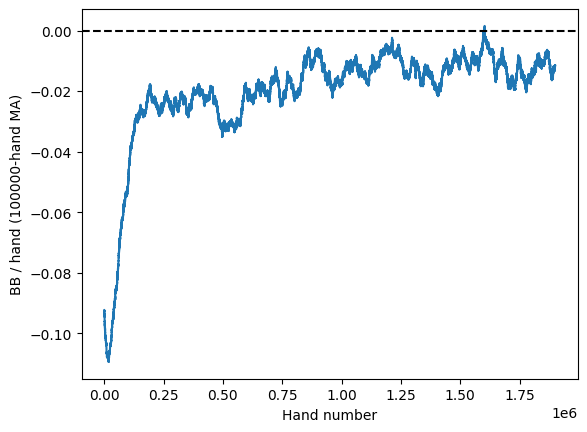

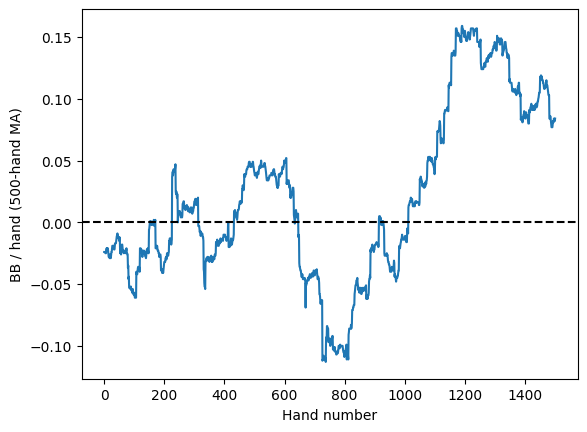

In [5]:
test_scores = ppo_interaction.test_multiagent(trained_agents)
print(test_scores)

import matplotlib.pyplot as plt

window = 100000
rolling = np.convolve(train_scores,
                      np.ones(window)/window, mode='valid')
plt.plot(rolling)
plt.axhline(0,color='k',ls='--')
plt.ylabel('BB / hand ({}-hand MA)'.format(window))
plt.xlabel('Hand number')
plt.show()

window = 500
rolling = np.convolve(test_scores,
                      np.ones(window)/window, mode='valid')
plt.plot(rolling)
plt.axhline(0,color='k',ls='--')
plt.ylabel('BB / hand ({}-hand MA)'.format(window))
plt.xlabel('Hand number')
plt.show()


# fig, (ax1, ax2)  = plt.subplots(1, 2)
# ax1.set_title("Training Scores")
# ax1.set_xlabel("Episodes")
# ax1.set_ylabel("Score")
# ax1.plot(train_scores)
# ax1.grid(True)

# ax2.set_title("Testing Scores")
# ax2.set_xlabel("Episodes")
# ax2.set_ylabel("Score")
# ax2.plot(test_scores)
# ax2.grid(True)

# plt.tight_layout()

# plt.show()


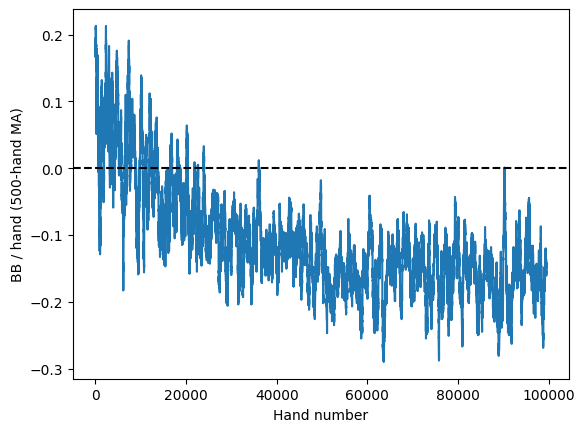

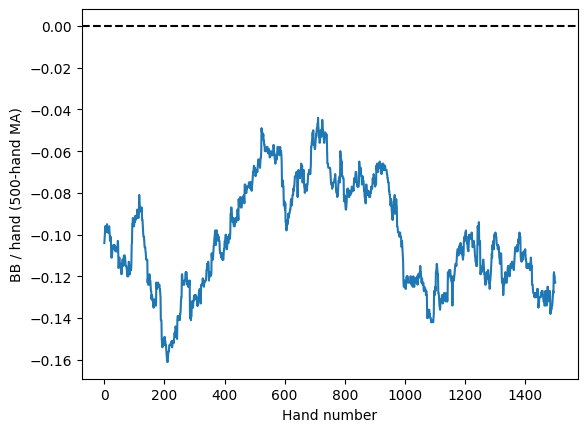

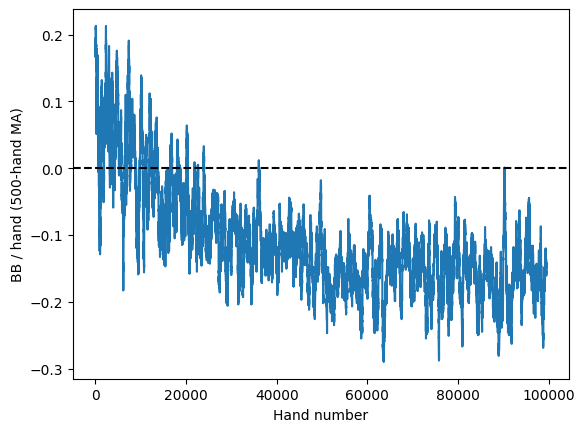

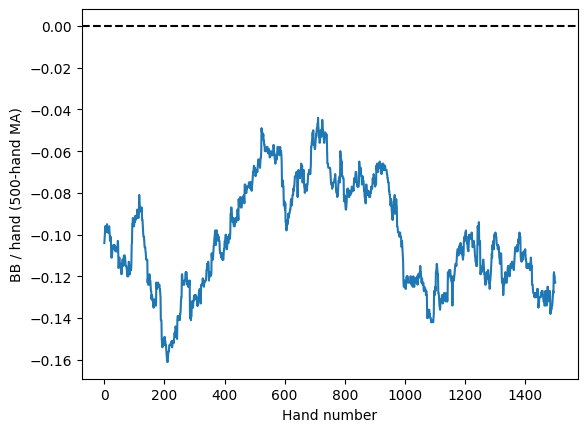

## PPO Example: LunarLander

In [ ]:
ppo_interaction = ppo.PPO_interaction(interaction_config=ppo_interaction_config,
                      actor_configs = actor_configs,
                      critic_configs = critic_configs
                  )

train_scores, trained_agents = ppo_interaction.train()

In [ ]:
test_scores = ppo_interaction.test()

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2)  = plt.subplots(1, 2)
ax1.set_title("Training Scores")
ax1.set_xlabel("Episodes")
ax1.set_ylabel("Score")
ax1.plot(train_scores)
ax1.grid(True)

ax2.set_title("Testing Scores")
ax2.set_xlabel("Episodes")
ax2.set_ylabel("Score")
ax2.plot(test_scores)
ax2.grid(True)

plt.tight_layout()

plt.show()

